In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
import numpy as np
from pathlib import Path
import pandas as pd
from scipy import signal

In [2]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

In [3]:
path ="Data_IDB/FT"
ext = "csv"
extention = r"{}".format(ext)
direction = Path(r"{}".format(path))
files_list = list(direction.glob(r"*.{}*".format(extention)))
csvs = []
for csv in files_list:
    csvs.append(str(csv))
csvs

['Data_IDB\\FT\\L7_2011.csv',
 'Data_IDB\\FT\\L7_2012.csv',
 'Data_IDB\\FT\\L7_2013.csv',
 'Data_IDB\\FT\\L7_2014.csv',
 'Data_IDB\\FT\\L7_2016.csv',
 'Data_IDB\\FT\\L8_2013.csv',
 'Data_IDB\\FT\\L8_2014.csv',
 'Data_IDB\\FT\\L8_2015.csv',
 'Data_IDB\\FT\\L8_2016.csv',
 'Data_IDB\\FT\\L8_2017.csv',
 'Data_IDB\\FT\\L8_2018.csv',
 'Data_IDB\\FT\\L8_2019.csv']

In [94]:
alldb = pd.DataFrame()
for csv in csvs:
    file = pd.read_csv(csv)
    alldb = pd.concat([alldb,file],ignore_index = True)
alldb


,NDVI,OSAVI,EVI,NWVI,ID,date
0,0.474799,0.357199,0.398555,-0.063412,307911,2011-04-16
1,0.740011,0.534539,0.559756,-0.223938,307911,2011-11-10
2,0.811786,0.596933,0.645622,-0.325548,307911,2011-12-28
3,0.619646,0.435611,0.434641,-0.188199,379211,2011-02-11
4,0.604652,0.385234,0.343954,-0.125035,380711,2011-02-11
...,...,...,...,...,...,...
78377,0.556873,0.372429,0.323569,0.543561,391511,2019-12-17
78378,0.579637,0.321882,0.258821,0.541628,363121,2019-12-17
78379,0.325719,0.247085,0.255949,0.372041,369221,2019-12-17
78380,0.798318,0.508104,0.447568,0.638867,94911,2019-12-17


In [5]:
melt_db = alldb.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )
melt_db['date'] = pd.to_datetime(melt_db['date'], format='%Y-%m-%d')
ID = np.unique(melt_db.ID)
df1 = melt_db[melt_db.ID==ID[300]]

# print(df1.date.iloc[0][0:4])
print(str(df1.ID.iloc[0]))
df1.head()


386511


,date,ID,variable,value
2583,2011-01-01,386511,NDVI,0.564372
2807,2011-01-17,386511,NDVI,0.562944
3073,2011-02-02,386511,NDVI,0.517808
3421,2011-03-06,386511,NDVI,0.367900
3689,2011-03-22,386511,NDVI,0.315355


In [88]:
# sns.set_style("white")
rc={"font.weight":"bold",'figure.figsize':(30, 6),'axes.labelsize': 28, 
    'font.size': 28,'axes.titlesize': 28,'legend.fontsize': 18, 'axes.titlesize': 28,
   "lines.linewidth": 2.5,'font.sans-serif': "Times New Roman"}
# sns.set()
sns.set(style="white", rc=rc,font_scale = 1.8)

DATE = pd.DataFrame({
    'inside':['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01']
})

DATE['inside'] = pd.to_datetime(DATE['inside'], format='%Y-%m-%d')
# DATE
# sns.set_style("white")
# sns.set_context("paper",rc=rc,font_scale = 1.5)

# all time series

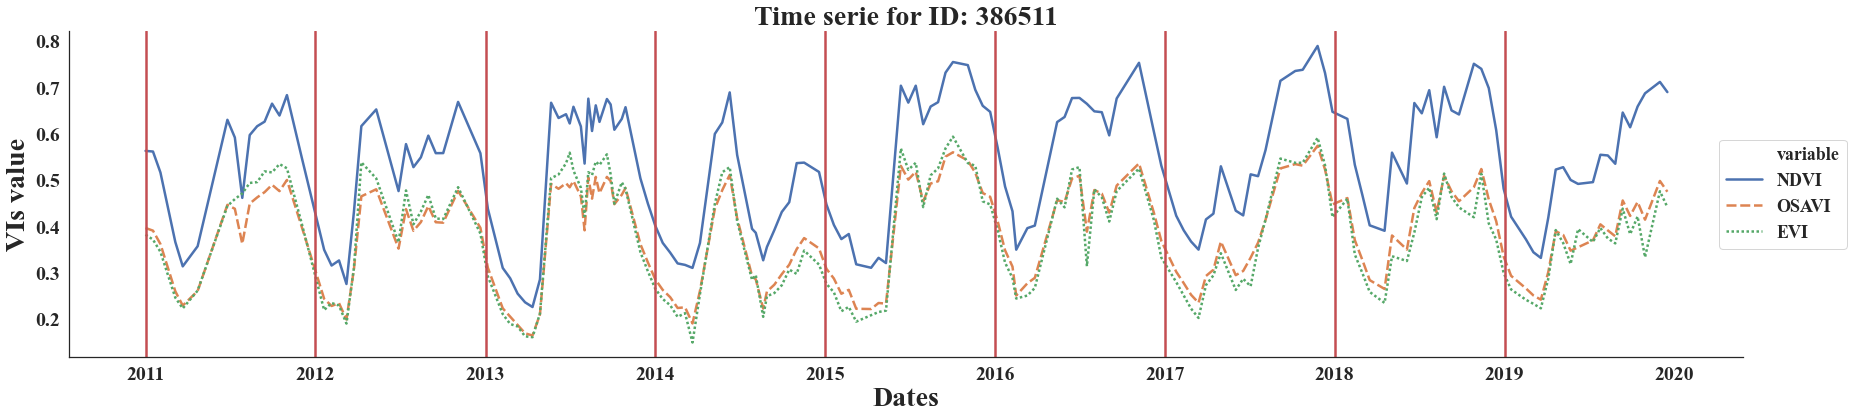

In [7]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=df1)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

# IMG PER YEAR

In [22]:
years = np.unique(df1['date'].dt.year)
for year in years:
    df = df1[df1['date'].dt.year == year]
    p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=df)
    p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
    # p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')

    handles, labels = p.get_legend_handles_labels()
    lgd = dict(zip(labels, handles))
    p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
    sns.despine()
    # for inside  in DATE.inside:
    #     p.axvline(inside,color='r',label="start year")
    # # p.xticks(rotation=45)
    # p.tick_params(axis='x', labelrotation=90)
    figure = p.get_figure()
#     figure.savefig('Data_IDB/trends/TS_'+str(year)+'-386511.png', dpi=600)
#     plt.close(figure)

# PLOT TO PDF

In [ ]:
with PdfPages('kde.pdf') as pdf_pages:
    for i in range(1, 114):
        for j in range(0, 113):
            x=t1.iloc[:, i]
            y=t1.iloc[:, j]
            joint_grid = sns.jointplot(x=x, y=y, kind="kde", dropna=True)
            pdf_pages.savefig(joint_grid.fig)

# Smoothing data

In [84]:
ID = np.unique(alldb.ID)
df1 = alldb[alldb.ID==ID[300]]
df1['time'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df1
years = np.unique(df1.time.dt.year)
# df = df1[df1['time'].dt.year == years[4]]

df1["NDVI"] = signal.savgol_filter(df1["NDVI"],9, 2, mode='nearest')
df1

<ipython-input-84-ca4ef58408fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
<ipython-input-84-ca4ef58408fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["smoothing"] = signal.savgol_filter(df1["NDVI"],9, 2, mode='nearest')


,ARVI,DNWVI,EVI,GNDVI,ID,IPVI,NDVI,NWVI,OSAVI,TGI,patca,date,time,smoothing
2583,0.446606,-0.616963,0.383650,0.598617,386511,0.782186,0.564372,0.029126,0.398044,0.006680,1,2011-01-01,2011-01-01,0.566907
2807,0.446774,-0.614543,0.373083,0.587574,386511,0.781472,0.562944,0.041560,0.392372,0.008334,1,2011-01-17,2011-01-17,0.523557
3073,0.391077,-0.607420,0.346667,0.556816,386511,0.758904,0.517808,0.075980,0.363484,0.007040,1,2011-02-02,2011-02-02,0.445616
3421,0.212684,-0.594598,0.247897,0.470611,386511,0.683950,0.367900,0.172161,0.261556,-0.002638,1,2011-03-06,2011-03-06,0.411568
3689,0.150696,-0.573322,0.224683,0.440885,386511,0.657678,0.315355,0.177244,0.230747,-0.006850,1,2011-03-22,2011-03-22,0.421099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77035,0.481324,-0.753702,0.384699,0.777283,386511,0.807627,0.615255,0.578367,0.424104,0.019701,1,2019-09-28,2019-09-28,0.632941
77246,0.554532,-0.740325,0.422976,0.781390,386511,0.829966,0.659931,0.599944,0.454265,0.020376,1,2019-10-14,2019-10-14,0.664123
77507,0.582125,-0.753423,0.335063,0.810885,386511,0.844228,0.688456,0.601391,0.416038,0.017638,1,2019-10-30,2019-10-30,0.686861
78013,0.621838,-0.750977,0.477307,0.815442,386511,0.856538,0.713077,0.619923,0.499506,0.020916,1,2019-12-01,2019-12-01,0.690256


In [145]:
df = alldb[["NDVI","OSAVI","EVI","NWVI","ID","date"]]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

ID = np.unique(df.ID)
df1 = df[df.ID==ID[100]]

smootdf = df1[["NDVI","OSAVI","EVI","NWVI"]]
copydf = smootdf.copy()
smootdf = smootdf.apply(lambda x: signal.savgol_filter(x,15, 5, mode='nearest'),0,result_type='broadcast')
smootdf

df_c = pd.concat([df1[["ID","date"]].reset_index(drop=True), smootdf.reset_index(drop=True)], axis=1)
df_c
melt_smooth = df_c.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )

<ipython-input-145-cee355262d82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


In [150]:
melt_db = df1.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )

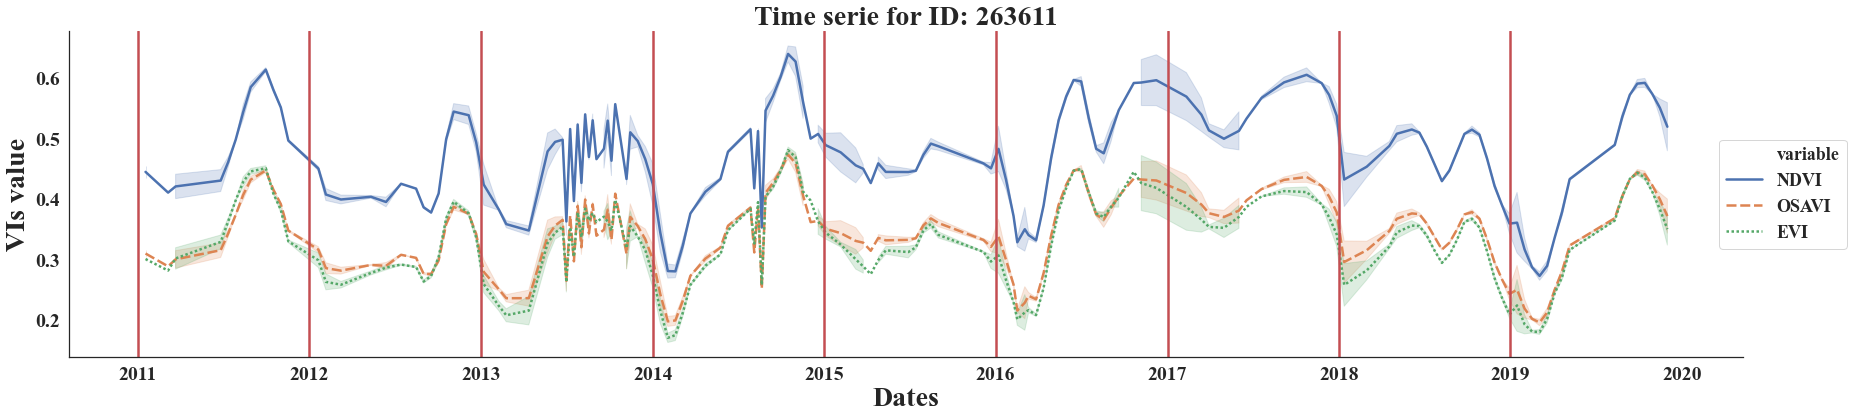

In [147]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_smooth)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

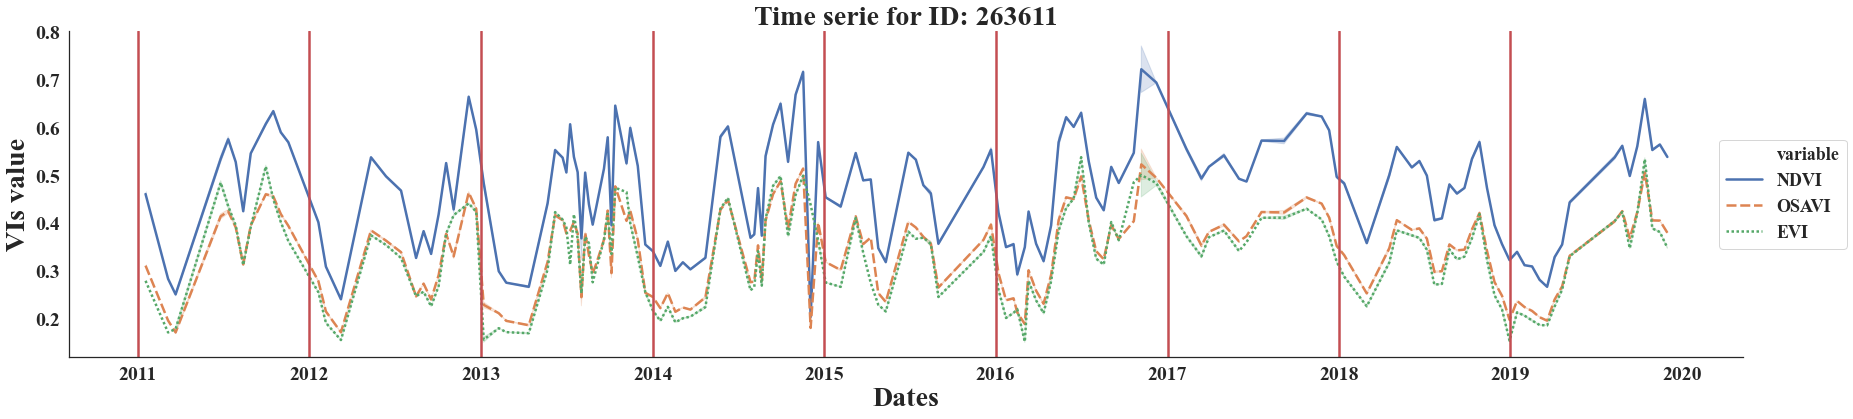

In [151]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_db)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)